<h2 style="color:orange;font-weight:bold;font-family:arial">Speech Emotion Recognition System</h2>
<h3 style="color:blue;font-weight:bold;font-family:arial">Group 1</h3>

##### Samruddhi Khairnar - kbtug20170@kbtcoe.org 
##### Avichal Sharma - avichalsharma2003@gmail.com
##### Yash Rokade - rokadeyash34@gmail.com
##### Araya Gupta - arayagupta28@gmail.com
##### Priyanshu Bisht - bisht.priyanshu05@gmail.com

#### **Imports** :

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **Loading the dataset** :

In [69]:
df = pd.read_csv('crema.csv')

In [70]:
df.head()

,actor,sentence,emotion,level,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,c_sync5b,c_sync6b,c_sync7b,c_sync8b,c_sync9b,c_sync10b,c_sync11b,spectral_bandwidth,spectral_rolloff,spectral_centroids
0,1003,IEO,FEA,MD,-442.13385,148.66585,-12.393108,43.702293,-14.106911,31.666414,...,-0.094215,1.250412,-1.099822,1.336237,1.001362,0.901887,0.000000,1753.417589,2785.441081,1345.206303
1,1035,IEO,SAD,MD,-456.98022,147.26843,18.193262,57.780663,-19.561325,29.044651,...,1.346589,0.585666,1.374014,-1.194583,-1.352278,-0.954247,-0.486541,1832.596789,2824.083411,1185.014857
2,1007,TSI,DIS,XX,-370.19382,116.20629,17.901112,49.743855,-7.893039,19.238430,...,1.068119,-1.067556,0.899730,-1.146053,-1.357509,-0.927797,1.177180,1900.091707,3297.628568,1536.535534
3,1026,DFA,NEU,XX,-363.48978,135.66432,18.392607,44.086580,2.274494,8.899861,...,0.951838,1.411809,-1.418981,0.701826,-1.313619,1.568683,1.446087,1632.537361,2494.882437,1195.103489
4,1088,ITS,ANG,XX,-335.75950,108.33419,8.823876,42.977585,-8.425694,25.288710,...,-0.358800,-1.348718,-1.300794,-1.314174,0.339107,-1.547805,1.565587,1915.807117,3553.740832,1846.447807


#### **Plotting the number of records for each emotion** :

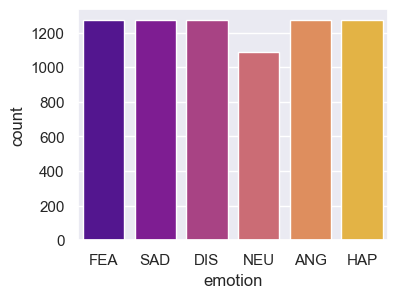

In [71]:
sns.set(rc={'figure.figsize':(4,3)})
sns.countplot(x='emotion', data=df, palette='plasma');

#### **One hot encoding the level feature, for training model** :

In [72]:
df.level.unique()

array(['MD', 'XX', 'LO', 'HI', 'X'], dtype=object)

In [73]:
df = pd.get_dummies(df, columns=['level'])

In [74]:
df.head()

,actor,sentence,emotion,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,...,c_sync10b,c_sync11b,spectral_bandwidth,spectral_rolloff,spectral_centroids,level_HI,level_LO,level_MD,level_X,level_XX
0,1003,IEO,FEA,-442.13385,148.66585,-12.393108,43.702293,-14.106911,31.666414,-21.379318,...,0.901887,0.000000,1753.417589,2785.441081,1345.206303,0,0,1,0,0
1,1035,IEO,SAD,-456.98022,147.26843,18.193262,57.780663,-19.561325,29.044651,-16.329254,...,-0.954247,-0.486541,1832.596789,2824.083411,1185.014857,0,0,1,0,0
2,1007,TSI,DIS,-370.19382,116.20629,17.901112,49.743855,-7.893039,19.238430,-12.107360,...,-0.927797,1.177180,1900.091707,3297.628568,1536.535534,0,0,0,0,1
3,1026,DFA,NEU,-363.48978,135.66432,18.392607,44.086580,2.274494,8.899861,-18.373417,...,1.568683,1.446087,1632.537361,2494.882437,1195.103489,0,0,0,0,1
4,1088,ITS,ANG,-335.75950,108.33419,8.823876,42.977585,-8.425694,25.288710,-23.794130,...,-1.547805,1.565587,1915.807117,3553.740832,1846.447807,0,0,0,0,1


In [75]:
df.shape

(7442, 168)

#### **Replacing Emotion feature by integer values, for model training** :

In [76]:
emotions = {'ANG':0, 'DIS':1, 'FEA':2, 'HAP':3, 'NEU':4, 'SAD':5}

In [77]:
df.emotion.replace(emotions, inplace = True)

#### **Handling Missing Values** :

In [78]:
import warnings 
warnings.filterwarnings('ignore')

In [79]:
df.fillna(df.mean(), inplace=True)

In [80]:
df.isna().sum().sum()

0

#### **Splitting the dataset into training and testing sets** :

In [81]:
df.drop(['sentence','actor'], axis=1, inplace=True)

In [82]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.30)

In [83]:
train_x, train_y = train.drop('emotion', axis=1), train.emotion.values
test_x, test_y = test.drop('emotion', axis=1), test.emotion.values

#### **Scaling the dataset** :

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x, test_x = sc.fit_transform(train_x), sc.fit_transform(test_x)

#### **Building a Deep Neural Network**:

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

model=Sequential()

model.add(Dense(100,input_shape=(165,)))
model.add(Activation('sigmoid'))

model.add(Dense(200))
model.add(Activation('sigmoid'))

model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(6))
model.add(Activation('sigmoid'))

#### **Compiling and Fitting the model to training data**:

In [122]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [123]:
model.fit(train_x, train_y, batch_size=100, epochs=60)

Epoch 1/60
53/53 [==============================] - 1s 4ms/step - loss: 1.9034 - accuracy: 0.1680
Epoch 2/60
53/53 [==============================] - 0s 4ms/step - loss: 1.7496 - accuracy: 0.2267
Epoch 3/60
53/53 [==============================] - 0s 4ms/step - loss: 1.5978 - accuracy: 0.3204
Epoch 4/60
53/53 [==============================] - 0s 4ms/step - loss: 1.5419 - accuracy: 0.3456
Epoch 5/60
53/53 [==============================] - 0s 4ms/step - loss: 1.5138 - accuracy: 0.3584
Epoch 6/60
53/53 [==============================] - 0s 4ms/step - loss: 1.4921 - accuracy: 0.3713
Epoch 7/60
53/53 [==============================] - 0s 4ms/step - loss: 1.4708 - accuracy: 0.3899
Epoch 8/60
53/53 [==============================] - 0s 3ms/step - loss: 1.4548 - accuracy: 0.3966
Epoch 9/60
53/53 [==============================] - 0s 4ms/step - loss: 1.4347 - accuracy: 0.4058
Epoch 10/60
53/53 [==============================] - 0s 4ms/step - loss: 1.4087 - accuracy: 0.4220
Epoch 11/60
53/53 [

#### **Evaluating the model on testing set**:

In [124]:
model.evaluate(test_x, test_y, batch_size=20)

112/112 [==============================] - 0s 2ms/step - loss: 1.8027 - accuracy: 0.4111


[1.8027468919754028, 0.411106139421463]

#### **Saving the trained model** :

In [111]:
import pickle
with open('speech_emotion_classifier.pkl','wb') as f:
    pickle.dump(model, f)

#### **Loading the model for classification** :

In [136]:
emotions = {'Angry':0, 'Disgust':1, 'Fear':2, 'Happy/Joy':3, 'Neutral':4, 'Sad':5}
emo = list(emotions.keys())

In [140]:
with open('speech_emotion_classifier.pkl','rb') as f:
    loaded = pickle.load(f)
    pred = loaded.predict(train_x[3456].reshape((1,165)))
    print(emo[int( np.where( pred == pred.max() )[1] )])

1/1 [==============================] - 0s 67ms/step
Fear
